# Teoría potencial linealizada 2D
La teoría potencial linealizada bidimensional se basa en la resolución de la ecuación de Laplace en dos dimensiones para un fluido incompresible y estacionario. En esta teoría, se asume que las fluctuaciones en la velocidad y la presión son pequeñas en comparación con las velocidades y presiones características del fluido. Frente a una resolución de las ecuaciones en cada punto del espacio discretizado, como podría ser a través del método de elementos o volúmenes finitos, a través del método de singularidades se calcula la velocidad en el campo fluido a través de la integración o sumatorio de la contribución de éstas, y la implementación de las condiciones de contorno, como se muestra en la figura inferior. Se emplean manantiales, sumideros, torbellinos, que pueden ser estar localizados de forma puntual, o extendidos en líneas o planos. 

<p align="center">
  <img width="800" src=./Grid_vs_Singularity_Drela.png>
<br><b>Método de malla discretizada frente a método de singularidades. <br>Imagen modificada de <i>"Flight Vehicle Aerodynamics"</i> (MIT Press, 2014)</b>
</p>



## El potencial complejo
Recordemos nuestro planteamiento del análisis de un sistema fluido, bajo las siguientes condiciones:
- Flujo incompresible, la ecuación de la continuidad queda reducida a imponer una divergencia de la velocidad nula: $ \nabla \cdot \vec{V}$
- Flujo irrotacional, impuesto matemáticamente a través de un rotor de la velocidad nulo: $\nabla \times \vec{V}$
- Viscosidad del fluido despreciable, excepto en zonas determinadas (capas límite)
- Podemos expresar la velocidad como el gradiente de una función escalar, $\Phi=\Phi(x,y,z,t)$: $\vec{V}=\nabla \times$  --> (revisar punto 1.3 del libro "_Aerodinámica Básica_")

Bajo estas condiciones, recuperamos $\nabla \times \vec{V} = \nabla \times \nabla \Phi = 0$, y finalmente $\nabla^2 \Phi = \Delta \Phi = 0$. Esta última ecuación es la conocida **Ecuación Diferencial de Laplace**, e implica que las soluciones del campo de velocidades van a ser lineales, y se va a poder aplicar el **principio de superposición**. 
Es decir, si podemos descomponer el campo fluido en varias soluciones elementales, su superposición lineal recuperaría la configuración original. Esta aproximación matemática (válida para las condiciones arriba expuestas), permite explorar gran cantidad de configuraciones aerodinámicas, como estudiaremos este curso.

### Potencial complejo bidimensional
Para el caso particular de un flujo bidimensional, la ecuación para el potencial de velocidades puede escribirse como
$$ \Delta \Phi = \frac{\partial^2 \Phi}{\partial x^2} + \frac{\partial^2 \Phi}{\partial z^2} = 0,$$
donde recordemos que los componentes de la velocidad son $U = \partial \Phi / \partial x$ y $W = \partial \Phi / \partial z$.

Como se ha visto en las sesiones de clase (revisar sección 2.2 del libro "_Aerodinámica Básica_"), es conveniente definir un **potencial complejo**, $f(t) = \Phi(x,z) + i\Psi(x,z)$, que englobe nuestra **función potencial** ($\Phi$) y la conocida **función de corriente** ($\Psi$). Esta última posee valor constante a lo largo de las líneas de corriente, y puede ser evaluada convenientemente para calcular el gasto a través de un tubo de corriente.
La utilidad de definir el potencial complejo, es que matemáticamente podemos expresar el vector velocidad a través de una función en el campo complejo, y trabajar así de forma conjunta con ambos componentes del campo de velocidades. De esta forma, la derivada del potencial complejo nos devuelve la **velocidad conjugada**, pudiendo recoger ambos componentes de la velocidad en una expresión:
$$\frac{\mathrm{d}f}{\mathrm{d}t} =  \frac{\partial \Phi}{\partial x} + i \frac{\partial \Psi}{\partial x} = U - iW, $$
y, entre otras propiedades, encontrar dónde se sitúan los puntos de remanso (velocidad nula) simplemente encontrando las raíces de $\mathrm{d}{f}/\mathrm{d}t=0$.

Para un cálculo analítico, esta aproximación es muy util y matemáticamente más agil que trabajar con reales. Sin embargo, la implementación numérica será más evidente (al menos en este punto) si trabajamos con las componentes de la velocidad, $U$ y $V$, directamente.

## Soluciones elementales
### Manantial y sumidero
La primera de las soluciones elementales vistas es el *manantial* (o fuente). Se trata de un punto (singularidad) que **emite gasto**, introduciendo un gasto volumétrico (o caudal) en el sistema. De forma alternativa, podríamos disponer de un punto que **absorbiese gasto**, tratándose entonces de un *sumidero*.

Recordemos que, gracias a la superposición de soluciones, podemos calcular el campo de velocidades en un campo fluido a traves de la superposición de soluciones elementales que permitan obtener **funciones** $ \mathbb{R}^ 2 \Rightarrow \mathbb{R}$, para cada componente de la velocidad, por ejemplo $U(x,z)$.

Por ejemplo, la formulación matemática vista durante las clases de teoría permmite calcular la velocidad inducida por un manantial de intensidad $Q$, que se encuentra localizado en $t_Q=(x_Q, z_Q)$, en un punto del espacio, $p=(x_p, z_p)$ (o $t=x_p+iz_p$, escrito en forma compleja), situado a una distancia radial $r$ del manantial. Partiendo de la definición del potencial complejo para un manantial,
$$f(t) = \frac{Q}{2\pi} \ln(t-t_Q),$$
podemos hacer la derivación de la función para extraer las distintas componentes de la velocidad en el campo fluido $(x,z)$:
$$\frac{\mathrm{d}f}{\mathrm{d}t} = \frac{Q}{2\pi} \frac{1}{t-t_Q} = \frac{Q}{2\pi} \frac{1}{(x_p-x_Q)+i(z_p-z_Q)} = 
\frac{Q}{2\pi} \frac{(x_p-x_Q) - i(z_p-z_Q)}{(x_p-x_Q)^2+(z_p-z_Q)^2} = \frac{Q}{2\pi r} \frac{(x_p-x_Q) - i(z_p-z_Q)}{r},  $$
donde $r=\sqrt{x^2+z^2}$.

De este modo, la velocidad horizontal se correspondería con la parte real de la expresión:
$$ U = \frac{Q}{2\pi r}\cos{\theta} = \frac{Q}{2\pi r} \frac{(x_p-x_Q)}{r} = U - iW.$$
Nótese el cambio de coordenadas polares a cartesianas (ver Figura 2.4 del libro _"Aerodinámica Básica_"), y como la velocidad decae con la distancia del manantial/sumidero. La velocidad en un punto del espacio $p=(x_p, z_p)$ generada por el manantial/sumidero será mayor cuanto mayor sea la intensidad $Q$, y menor cuanto mayor sea la distancia a la singularidad, $r$.
Del mismo modo, la velocidad vertical será:
$$ W = \frac{Q}{2\pi r}\sin{\theta} = \frac{Q}{2\pi r} \frac{(z_p-z_Q)}{r}.$$

#### Consideraciones teóricas de los manantiales y sumideros
- Las unidades de $Q$ diferirán si tratamos una formulación 2D o 3D. De las definiciones dadas para los componentes de la velocidad en una formulación **bidimensional**, se extrae que $Q$ debería tener unidades de $m^2/s$. Estaríamos hablando de una versión en dos dimensiones del gasto volumétrico (un corte por un plano XZ del espacio tridimensional). Veremos más adelante los manantiales tridimensionales.
- Al introducir masa con cierta velocidad al sistema fluido, estaremos **aumentando la cantidad de movimiento** contenida en nuestro volumen de control. Por tanto, la presencia de manantiales o sumideros implican la presencia de una fuerza en el fluido, necesaria para la aceleración o cambio de trayectoria de las partículas.
- En el punto donde el manantial/sumidero se situa, existe una singularidad, que deberá ser tratada como tal al evaluar matemáticamente el dominio.

### Doblete
La superposición de un manantial y un sumidero. Lo veremos numéricamente más adelante.

### Torbellino potencial
La **circulación** quedó definida como la proyección de la velocidad a lo largo de una línea cerrada:
$$\Gamma = \iint_C \vec{V} \cdot \mathrm{d}\vec{l}.$$

Como el movimiento del sistema fluido es irrotacional, debemos tomar una serie de consideraciones:
- El valor de la vorticidad en el dominio ($\nabla \times \vec{V}$) debe ser nulo, salvo en puntos singulares.
- El valor de la vorticidad puede ser distinto de cero **en líneas cerradas** que encierren la singularidad.
- Un valor de circulación no nulo, no implica que el fluido se mueve en círculos dentro del volumen de control, sino que el valor de la integral arriba definida es finito y distinto de cero (para extender en este concepto, se recomienda leer el apartado 2.13 del libro _"Fundamentals of Aerodynamics"_).

Podemos modelar la presencia de un torbellino potencial (aislado) induciendo velocidades que sean tangentes a circunferencias con centro en la singularidad (torbellino). De este modo, la velocidad angular generada será constante en la coordenada azimutal (variando el ángulo), pero decaerá según nos alejemos del torbellino (aumentando la coordenada radial, $r$). Los componentes de la velocidad quedan por tanto definidos como:
$$ U = \frac{Q}{2\pi r}\sin{\theta} = \frac{Q}{2\pi r} \frac{(z_p-z_Q)}{r},$$
$$ W = -\frac{Q}{2\pi r}\cos{\theta} = -\frac{Q}{2\pi r} \frac{(x_p-x_Q)}{r}.$$


### Códigos Python para la representación de soluciones elementales
En los siguientes párrafos se presenta una propuesta de cálculo numérico para el modelado discreto del flujo potencial. Existen muchas formas de realizar este cálculo, en este texto se presenta una alternativa sencilla que hace uso del módulo *NumPy* de Python, así como una representación gráfica de la función de corriente y el campo de velocidades mediante el módulo *Matplotlib*.

Nótese que en lo que corresponde al texto escrito en este documento de aqui en adelante, se usan variables en **negrita** para denotar vectores o matrices.

Junto a este documento se dispone de códigos MatLab o Python para su ejecución independiente, así como del Notebook original. 

Del mismo modo, se puede ejecutar de forma online a través del siguiente enlace: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/AMartinezCava/pyAero/HEAD?labpath=Notebook_RANKINE.ipynb)

In [45]:
# 1. Importación de módulos
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [46]:
# 2. Definición de las funciones de cálculo del campo de velocidades
def velocity_field_Q(x, z, Q, x_s, z_s):
    """
    Calcula el campo de velocidades inducido por un manantial o sumidero.
    
    Parámetros:
    x, z -- coordenadas en el plano xz
    Q -- magnitud del manantial/sumidero
    x_s, z_s -- coordenadas de la singularidad
    
    Devuelve:
    u, w -- componentes del campo de velocidades
    """
    u = np.zeros_like(x, dtype='f8')
    w = np.zeros_like(z, dtype='f8')
    r = np.sqrt((x - x_s)**2 + (z - z_s)**2)
    u += Q * (x - x_s) / (2 * np.pi * r**2)
    w += Q * (z - z_s) / (2 * np.pi * r**2)
    
    return u, w

## --------------------------------------------------------------------------- ##

def velocity_field_GAMMA(x, z, G, x_s, z_s):
    """
    Calcula el campo de velocidades inducido por una serie finita de torbellinos potenciales puntuales.
    
    Parámetros:
    x, z -- coordenadas en el plano xz
    G -- magnitud del torbellino
    x_s, z_s -- coordenadas de la singularidad
    
    Devuelve:
    u, w -- componentes del campo de velocidades
    """
    u = np.zeros_like(x, dtype='f8')
    w = np.zeros_like(z, dtype='f8')
    r = np.sqrt((x - x_s)**2 + (z - z_s)**2)
    u += G * (z - z_s) / (2 * np.pi * r**2)
    w += -G * (x - x_s) / (2 * np.pi * r**2)
    
    return u, w

La función *velocity_field* toma como entrada las coordenadas **x** e **z** en el plano xz, la magnitud **Q** de los manantiales y sumideros (o **G**, intensidad $\Gamma$ de los torbellinos), y las coordenadas **x_s**, **z_s** de las singularidades. La función devuelve las componentes **u** y **w** del campo de velocidades.

Para calcular las componentes del campo de velocidades, se calcula la contribución de cada singularidad en las componentes **u** y **w** utilizando la formulación matemática correspondiente. 

Podemos utilizar esta función para calcular el campo de velocidades en los distintos ejes del sistema de referencia empleado, tanto a nivel vectorial como a nivel puntual, y usar esos datos para visualizar la solución en un gráfico.

In [47]:
# Definimos las coordenadas del manantial/sumidero
Q = 15
x_s = -2
z_s = 0

# Se definen también sus coordenadas en el plano complejo, para el cálculo del potencial.
t_s = x_s + 1j*z_s

# Definimos una malla para las coordenadas x e z 
## --> ESTO SOLO ES NECESARIO PARA LA VISUALIZACIÓN GRÁFICA, NO EL CÁLCULO DE LA VELOCIDAD
nx, nz = 60, 60
x = np.linspace(-10, 10, nx)
z = np.linspace(-10, 10, nz)
Xm, Zm = np.meshgrid(x, z)
Tm = Xm + 1j*Zm

# Calculamos las componentes u y v del campo de velocidades inducido por los manantiales o sumideros
u_man, w_man = velocity_field_Q(Xm, Zm, Q, x_s, z_s)
u_sum, w_sum = velocity_field_Q(Xm, Zm, -Q, x_s, z_s)   # Simplemente cambiamos de signo la intensidad

# Construimos la funcion potencial para el manantial y el sumidero
pot = Q*np.log(Tm - t_s) / (2*np.pi)
pot_sum = -Q*np.log(Tm - t_s) / (2*np.pi)

# De la función potencial extraemos tanto el potencial de velocidades (Phi) como la función de corriente (Psi)
phi = pot.real
psi = pot.imag

phi_sum = pot_sum.real
psi_sum = pot_sum.imag

Una vez calculados el campo de velocidades, se calcula la función potencial de la forma habitual. Se recuerda que $f(t) = \Phi - i\Psi$, por lo que tras construir $f(t)$ es sencillo extraer tanto el potencial de velocidades, $\Phi$, como la función de corriente, $\Psi$.

Tras la fase de cálculo, es conveniente representar gráficamente la solución. Para ello hacemos uso de las funciones *contourf* y *contour* de Matplotlib, para representar el campo de la Función de Corriente ($\Psi$), y la línea de corriente correspondiente a $\Psi=0$.

Por último, empleamos la función *streamplot* para representar el campo de velocidades vectorial de forma más visual. 
¡Nótese como el valor de la función de corriente es constante a lo largo de las líneas de corriente!

Aunque sabemos que $\dot{f}(t)= \Phi_x - i \Phi_z = U - iW$, disponemos del campo de velocidades calculado previamente, en las variables **u** y **w**.

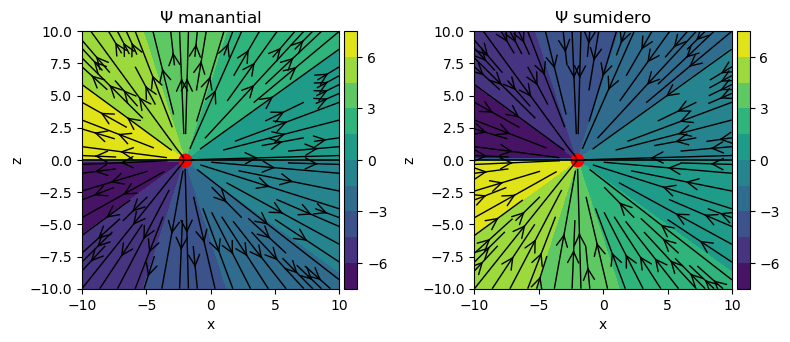

In [48]:
# Visualizamos la función de corriente
fig, axes = plt.subplots(1, 2, figsize=(8,6))                                         # Creamos la figura con 2 subplots
ax1, ax2 = axes.flatten()                                             # Recuperamos los ejes de ambos gráficos
divider = make_axes_locatable(ax2)                                     # Ajustamos la posición de la barra de niveles
cax = divider.append_axes('right', size='5%', pad=0.05)
divider2 = make_axes_locatable(ax1)                                     # Ajustamos la posición de la barra de niveles
cax2 = divider2.append_axes('right', size='5%', pad=0.05)

cont = ax1.contourf(Xm, Zm, psi, 10, cmap='viridis')                  # Pintamos los contornos
cont = ax2.contourf(Xm, Zm, psi_sum, 10, cmap='viridis')

ax1.contour(Xm, Zm, psi, levels=[0], colors=['black'], linewidths=1.2) # Representamos la línea de corriente psi=0    
ax2.contour(Xm, Zm, psi_sum, levels=[0], colors=['black'], linewidths=1.2)

fig.colorbar(cont, cax=cax, orientation='vertical')                   # Pintamos la barra de niveles
fig.colorbar(cont, cax=cax2, orientation='vertical')                 

ax1.streamplot(Xm, Zm, u_man, w_man, color='black',
               density=1, linewidth=1, arrowsize=2, arrowstyle='->')  # Representamos el campo vectorial normalizado
ax1.set_title(r'$\Psi$ manantial')
ax2.streamplot(Xm, Zm, u_sum, w_sum, color='black',
               density=1, linewidth=1, arrowsize=2, arrowstyle='->')  # Representamos el campo vectorial normalizado
ax2.set_title(r'$\Psi$ sumidero')

for ax in axes:                                                       # Aprovechamos el tratamiento de gráficas de Python
    ax.scatter(x_s, z_s,                                                # para realizar tareas estéticas en bucle
                color='red', s=80, marker='o')

    ax.set_xlabel('x')                                                    # Etiquetamos de forma apropiada, y mostramos en pantalla
    ax.set_ylabel('z')
    ax.set(xlim=(-10, 10), ylim=(-10, 10))
    ax.set_aspect('equal','box')
    # plt.show()
plt.tight_layout()

En algún caso, la visualización vectorial puede confundir al observador, al parecer que hay vectores que "atraviesen" las línea de corriente. Téngase en cuenta que los vectores dibujados dependen de la discretización espacial utilizada, y su longitud está condicionada por los parámetros empleados en la llamada a la función. La velocidad es **siempre** tangente a las líneas de corriente, y éstas **nunca** se pueden cruzar.

De forma similar al proceso antes realizado, podríamos representar el campo de velocidades tanto horizontal como vertical:

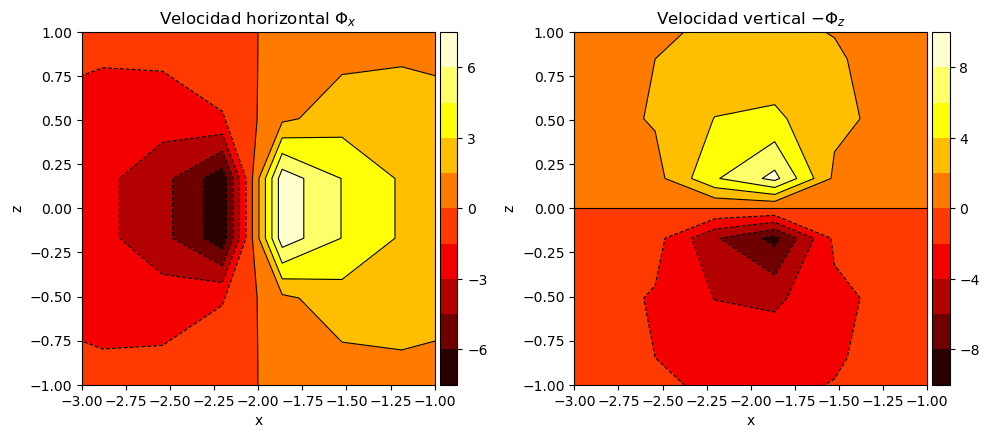

In [55]:
# Visualizamos el campo de velocidades y la función de corriente
fig, axes = plt.subplots(1,2, figsize=(10,8)) 
ax1, ax2 = axes.flatten()                                             # Creamos la figura, con dos plots integrados

dividerU = make_axes_locatable(ax1)                                   # Ajustamos la posición de la barra de niveles en U
caxU = dividerU.append_axes('right', size='5%', pad=0.05)
dividerV = make_axes_locatable(ax2)                                   # Ajustamos la posición de la barra de niveles en W
caxV = dividerV.append_axes('right', size='5%', pad=0.05)

ax1.set_title(r'Velocidad horizontal $\Phi_x$')
cont = ax1.contourf(Xm, Zm, u_man, 10, cmap='hot')                        # Pintamos los contornos de U
ax1.contour(Xm, Zm, u_man, levels=10, colors=['black'], linewidths=0.8)   # Representamos lineas de isocontornos
fig.colorbar(cont, cax=caxU, orientation='vertical')                  # Pintamos la barra de niveles

ax2.set_title(r'Velocidad vertical $-\Phi_z$')
cont = ax2.contourf(Xm, Zm, w_man, 10, cmap='hot')                        # Pintamos los contornos
ax2.contour(Xm, Zm, w_man, levels=10, colors=['black'], linewidths=0.8)   # Representamos la línea de corriente psi=0    
fig.colorbar(cont, cax=caxV, orientation='vertical')                  # Pintamos la barra de niveles


for ax in axes:
    ax.set_xlabel('x')                                                # Etiquetamos de forma apropiada, y mostramos en pantalla
    ax.set_ylabel('z')
    ax.set(xlim=(-3, -1), ylim=(-1, 1))
    ax.set_aspect('equal','box')
plt.tight_layout()
plt.show()

Podemos replicar el caso para el torbellino potencial, reaprovechando el código convenientemente (recomendable dividir por celdas el Notebook para procesar solo aquello que está dentro de la celda):

In [50]:
# Definimos las coordenadas del torbellino
G = 15
x_s = -2
z_s = 0

# Se definen también sus coordenadas en el plano complejo, para el cálculo del potencial.
t_s = x_s + 1j*z_s

# Definimos una malla para las coordenadas x e z 
## --> ESTO SOLO ES NECESARIO PARA LA VISUALIZACIÓN GRÁFICA, NO EL CÁLCULO DE LA VELOCIDAD
nx, nz = 60, 60
x = np.linspace(-10, 10, nx)
z = np.linspace(-10, 10, nz)
Xm, Zm = np.meshgrid(x, z)
Tm = Xm + 1j*Zm

# Calculamos las componentes u y v del campo de velocidades inducido por el torbellino
u_torb, w_torb = velocity_field_GAMMA(Xm, Zm, G, x_s, z_s)

# Construimos la funcion potencial para el torbellino
pot_torb = 1j*G*np.log(Tm - t_s) / (2*np.pi)

# De la función potencial extraemos tanto el potencial de velocidades (Phi) como la función de corriente (Psi)
phi = pot_torb.real
psi = pot_torb.imag

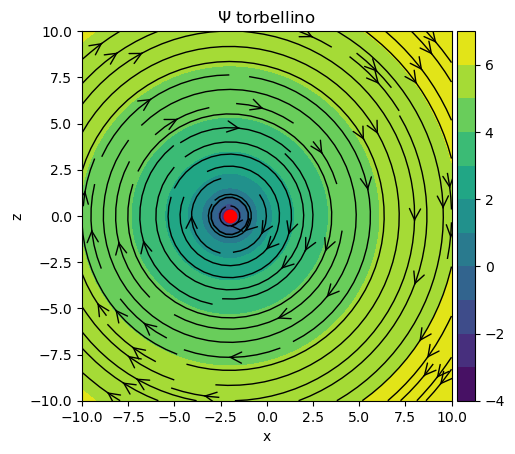

In [51]:
# Visualizamos la función de corriente
fig, ax = plt.subplots()                                         # Creamos la figura
divider = make_axes_locatable(ax)                                     # Ajustamos la posición de la barra de niveles
cax = divider.append_axes('right', size='5%', pad=0.05)

cont = ax.contourf(Xm, Zm, psi, 10, cmap='viridis')                  # Pintamos los contornos

ax.contour(Xm, Zm, psi, levels=[0], colors=['black'], linewidths=1.2) # Representamos la línea de corriente psi=0    

fig.colorbar(cont, cax=cax, orientation='vertical')                   # Pintamos la barra de niveles

ax.streamplot(Xm, Zm, u_torb, w_torb, color='black',
               density=1, linewidth=1, arrowsize=2, arrowstyle='->')  # Representamos el campo vectorial normalizado
ax.set_title(r'$\Psi$ torbellino')
                            
ax.scatter(x_s, z_s,                                                
            color='red', s=80, marker='o')
ax.set_xlabel('x')                                                    # Etiquetamos de forma apropiada, y mostramos en pantalla
ax.set_ylabel('z')
ax.set(xlim=(-10, 10), ylim=(-10, 10))
ax.set_aspect('equal','box')
# plt.show()

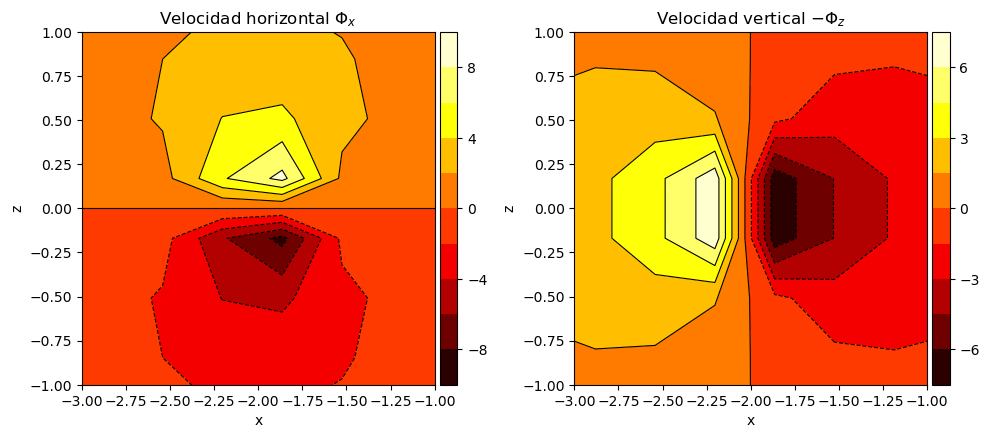

In [58]:
# Visualizamos el campo de velocidades y la función de corriente
fig2, axes = plt.subplots(1,2, figsize=(10,8)) 
ax3, ax4 = axes.flatten()                                             # Creamos la figura, con dos plots integrados

dividerU = make_axes_locatable(ax3)                                   # Ajustamos la posición de la barra de niveles en U
caxU = dividerU.append_axes('right', size='5%', pad=0.05)
dividerV = make_axes_locatable(ax4)                                   # Ajustamos la posición de la barra de niveles en W
caxV = dividerV.append_axes('right', size='5%', pad=0.05)

ax3.set_title(r'Velocidad horizontal $\Phi_x$')
cont = ax3.contourf(Xm, Zm, u_torb, 10, cmap='hot')                        # Pintamos los contornos de U
ax3.contour(Xm, Zm, u_torb, levels=10, colors=['black'], linewidths=0.8)   # Representamos lineas de isocontornos
fig2.colorbar(cont, cax=caxU, orientation='vertical')                  # Pintamos la barra de niveles

ax4.set_title(r'Velocidad vertical $-\Phi_z$')
cont = ax4.contourf(Xm, Zm, w_torb, 10, cmap='hot')                        # Pintamos los contornos
ax4.contour(Xm, Zm, w_torb, levels=10, colors=['black'], linewidths=0.8)   # Representamos la línea de corriente psi=0    
fig2.colorbar(cont, cax=caxV, orientation='vertical')                  # Pintamos la barra de niveles


for ax in axes:
    ax.set_xlabel('x')                                                # Etiquetamos de forma apropiada, y mostramos en pantalla
    ax.set_ylabel('z')
    ax.set(xlim=(-3, -1), ylim=(-1, 1))
    ax.set_aspect('equal','box')
plt.tight_layout()
plt.show()